# Challenge 1

**Goal** - Create a template for the class to use for building their capstone

**Requirements** - A successful project template at minimum includes sections to:

>1. Introduce the writer (of the capstone, not the template)
>2. Overviews the problem or area being investigated by the Capstone
>3. Succinctly captures the question being investigated
>4. Provides an overview of the data being used to answer the question
>5. Concludes with a summarized overview of the findings.

Here's a [cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet) to get you started on Markdown formatting. 

To submit - 
>1. Fork the ClassChallenge repo then clone it to your computer
>2. Complete the template on your computer
>3. Rename it to {Your Name}-CapstoneTemplate.ipynb
>4. Send it to your online repo
>     - git add .
>     - git commit -m "Capstone Template Submission"
>     - git push
>5. Submission has two options - Slack the Instructional Team the link to your submission in your repo ***or*** figure out the pull request process

In [1]:
# Maybe switch a Cell to Markdown and use it for the introduction with each area in a new cell

In [2]:
# Leave a few blocks open and use these comments that start with a Hash to leave space for the Data Science Workflow 

In [3]:
# Findings shouldn't necessarily be in comments... should they?

## This is my area for Machine learning

Philip Peker Capstone Project

Project Goal: To show a strong understanding of the power of Spotify data, specifically as a data analysis tool to better understand global music trends and patterns. 

Hypothesis 1: Using Spotify data, we predict which country or region a song's artist is from based on song attributes. 

Plausible Datasets:
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
https://www.kaggle.com/yamaerenay/spotify-artists-dataset-19222021

Goals/Metrics: I aim for 80% accuracy for the model to predict region of origin for said artist based on song attributes.  

Risks/Limitations:
- One key variable i'll need to identify is country/region of origin for each artist. This datapoint is not currently available with the Spotify Web API (see here: https://github.com/spotify/web-api/issues/210). Thus, no datasets based on the Spotify Web API will have this datapoint. 
    Solution 1: Identify a sample size n, for which I will manually need to input what country each i in n is from (i being artist)
    Solution 2: Pivot to second Hypothesis.
    
- There are a sizeable amount of x variables, and finding the right mix of x variables that best predict the y may be challenging. 

Hypothesis 2: Using Spotify data, we predict genre of song based on it's attributes, such as: danceability, valence, energy, acousticness, tempo etc. 

Goals Metrics: I aim for 80% accuracy for the model to predict genre based on song attributes. 

Risk/Limitations: 
- The way Spotify breaks out the genre categories is subjective and arbitrary (as genres are pretty fluid). This will be an inherent bias in my data, and will have generalization limitations outside of Spotify. So when I talk about "music", it must be caveated as music as Spotify defines it. 
- There are a sizeable amount of x variables, and finding the right mix of x variables that best predict the y may be challenging. 

    
    
Other key documents:
- https://spotipy.readthedocs.io/en/2.18.0/
  python library for Spotify web API 





## Initial EDA

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import os 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


%matplotlib inline

In [5]:
print("my path is ", os.getcwd()) 

my path is  C:\Users\Suma Marri\Documents\GitHub\Spotify


In [6]:
data = pd.read_csv("2019songs.csv") 
data.head(15)

C:\Users\Suma Marri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                                               name  \
0   4zP7ADsgJgHGY6VzxbNp1z                                          Year 3000   
1   5Q8lhXskGhfVIMbRMGi9nk                      Logical Brain - Year 3000 Mix   
2   6GEOjP12NG6wnuQIg6NC5A              3000 Years of Lies - Original Version   
3   0soQcQgZGxvHa3MyQMVfes                                   Year 3000 (Live)   
4   5g5fyKQcR8H5U5c7znvrgs                                      The Year 3000   
5   1FRqXqDtqxy0K99sQTWBWR                                     Year 3000 Funk   
6   1LG4omqDIUFAsAIX768f9g                             Vape Till da Year 3000   
7   1m4z23HIiOPNZsz6U81Psc  I Am Earning 300000 € This Year and I Am Very ...   
8   3Erk7PtpFjsUY4T9P8xyGO                     Psycho Beach Party 3000 (2011)   
9   0Ke4BNjApUhk9bgvRDNSUe            Most Precious Love - DF Future 3000 Mix   
10  35dUmoQxLByO0rH1JT4ZeS                                        Darth Vader   
11  0cz5MTRb9GkseDcgZ4JI9N                                       Don't Nobody   
12  3pHV4k0xnD07vqFYRGpFhe                                         Demolition   
13  2DpkEE6E7awYDlf2aVUj50                                 Dirty Hands, Pt. 2   
14  0ALmdYounN3NB0i4Kzpmv0                                       Dissociative   

    popularity  duration_ms  explicit  \
0         67.0     201960.0       0.0   
1          8.0     216705.0       0.0   
2          9.0     308824.0       0.0   
3          0.0     188145.0       0.0   
4          0.0     393676.0       0.0   
5          0.0     137822.0       0.0   
6          2.0     145334.0       0.0   
7          0.0     182000.0       0.0   
8          0.0     149893.0       0.0   
9          4.0     433320.0       0.0   
10         1.0     363555.0       0.0   
11         2.0     176483.0       1.0   
12         1.0     369340.0       0.0   
13         2.0     170945.0       1.0   
14         0.0     373139.0       0.0   

                                              artists  \
0                                  ['Jonas Brothers']   
1                                    ['Electro Mann']   
2                                             ['UVB']   
3                                      ['The Friars']   
4                                     ['Reza Golroo']   
5                                       ['Zeliwipin']   
6                                ['Craic Boi Mental']   
7                                   ['Paul Kienbeck']   
8                                         ['The KBK']   
9   ['Blaze', 'UDAUFL', 'Barbara Tucker', 'Dennis ...   
10                                    ['Reza Golroo']   
11                                     ['BuckHolmes']   
12                                    ['Reza Golroo']   
13                                     ['BuckHolmes']   
14                                    ['Reza Golroo']   

                                           id_artists release_date  \
0                          ['7gOdHgIoIKoe4i9Tta6qdD']     5/9/2019   
1                          ['715ETHjAlf1sXM4vFEmxjT']   10/24/2019   
2                          ['1LiE3TKOyCds5GgIaBRRRs']     2/8/2019   
3                          ['6Fb8ldZIVQEaszpTmZh0Du']    4/11/2019   
4                          ['5PgfADiJty3IuidZvOoFYM']     3/1/2019   
5                          ['037nAqPqJicOFdwscFyJAM']     3/5/2019   
6                          ['5KsCWlnWbfDVN7hAwm1C8Q']   10/30/2019   
7                          ['5h0OQm3X8UgJToDXrRL5kH']     9/4/2019   
8                          ['4u0kqsugXZAXjykqArePJe']     1/2/2019   
9   ['5yK5YSsWKH35QRTsHQHxEN', '2GTRVovNrpq94MSO7m...    6/21/2019   
10                         ['5PgfADiJty3IuidZvOoFYM']     3/1/2019   
11                         ['4nuJyaM3aRb5tmQKdVCTgY']     6/5/2019   
12                         ['5PgfADiJty3IuidZvOoFYM']     3/1/2019   
13                         ['4nuJyaM3aRb5tmQKdVCTgY']     6/5/2019   
14                         ['5PgfADiJty3IuidZvOoFYM']     3/1/2019   

    danceability   energy   key  lou

In [7]:
data.shape

(473795, 20)

In [8]:
data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [9]:
pd.DataFrame(data.dtypes, columns=['DataType'])


DataType
id                 object
name               object
popularity        float64
duration_ms       float64
explicit          float64
artists            object
id_artists         object
release_date       object
danceability      float64
energy            float64
key               float64
loudness          float64
mode              float64
speechiness       float64
acousticness      float64
instrumentalness  float64
liveness          float64
valence           float64
tempo             float64
time_signature    float64

In [10]:
data[['danceability', 'energy', 'tempo']].describe()


danceability        energy         tempo
count  10949.000000  10949.000000  10949.000000
mean       0.649780      0.635729    122.003987
std        0.160595      0.202034     29.657026
min        0.000000      0.000000      0.000000
25%        0.551000      0.510000     98.642000
50%        0.670000      0.657000    122.491000
75%        0.766000      0.787000    140.007000
max        0.977000      1.000000    217.832000

In [11]:
data['time_signature'].unique()


array([ 4.,  3.,  5.,  1.,  0., nan])

In [12]:
data['loudness'].unique()


array([ -5.85 , -11.286,  -5.869, ..., -12.244,  -6.356,     nan])

In [13]:
data['popularity'].unique()



array([67.,  8.,  9.,  0.,  2.,  4.,  1., 21., 27.,  7.,  3., 16., 13.,
        6., 14., 23., 11., 10., 22., 15., 12., 19.,  5., 24., 30., 25.,
       20., 51., 29., 17., 94., 92., 49., 90., 89., 88., 39., 38., 87.,
       36., 86., 85., 34., 33., 84., 32., 83., 31., 82., 81., 28., 80.,
       79., 18., 78., 77., 76., 75., 74., 73., 58., 50., 48., 45., 69.,
       43., 44., 59., 46., 42., 70., 41., 66., 65., 47., 71., 68., 61.,
       64., 60., 37., 72., 62., 63., 35., 57., 40., 56., 55., 54., 53.,
       52., 26., nan])

In [14]:
data.sort_values(by='popularity', ascending=False).head(12)


id                   name  popularity  duration_ms  \
336  60ynsPSSKe6O3sfwRnIBRf                Streets        94.0     226987.0   
337  6UelLqGlWMcVH1E5c4H7lY       Watermelon Sugar        92.0     174000.0   
339  7qEHsqek33rTcFNT9PFqLf      Someone You Loved        90.0     182161.0   
341  1Xi84slp6FryDSCbzq4UCD                 Arcade        89.0     183624.0   
340  21jGcNKet2qwijlDFuPiPb                Circles        89.0     215280.0   
347  3H7ihDc1dqLriiWXwsc2po            Breaking Me        88.0     166794.0   
346  0nbXyq5TXYPCO7pr3N8S4I                The Box        88.0     196653.0   
344  2b8fOow8UzyDFAE27YhOZM               Memories        88.0     189486.0   
353  3jjujdWJ72nww5eGnfs2E7              Adore You        88.0     207133.0   
342  45S5WTQEGOB1VHr1Q4FuPl                 Golden        88.0     208907.0   
343  24Yi9hE78yPEbZ4kxyoXAI  Roses - Imanbek Remix        88.0     176840.0   
351  2XU0oxnq2qxCpomAAuJY8K           Dance Monkey        88.0     209438.0   

     explicit                   artists  \
336       1.0              ['Doja Cat']   
337       0.0          ['Harry Styles']   
339       0.0         ['Lewis Capaldi']   
341       0.0       ['Duncan Laurence']   
340       0.0           ['Post Malone']   
347       0.0          ['Topic', 'A7S']   
346       1.0           ['Roddy Ricch']   
344       0.0              ['Maroon 5']   
353       0.0          ['Harry Styles']   
342       0.0          ['Harry Styles']   
343       1.0  ['SAINt JHN', 'Imanbek']   
351       0.0           ['Tones And I']   

                                            id_artists release_date  \
336                         ['5cj0lLjcoR7YOSnhnX0Po5']    11/7/2019   
337                         ['6KImCVD70vtIoJWnq6nGn3']   12/13/2019   
339                         ['4GNC7GD6oZMSxPGyXy4MNB']    5/17/2019   
341                         ['3klZnJvYGIbWritVwQD434']     3/7/2019   
340                         ['246dkjvS1zLTtiykXe5h60']     9/6/2019   
347  ['0u6GtibW46tFX7koQ6uNJZ', '5Wg2b4Mp42gicxEeDN...   12/19/2019   
346                         ['757aE44tKEUQEqRuT6GnEB']    12/6/2019   
344                         ['04gDigrS5kc9YWfZHwBETP']    9/20/2019   
353                         ['6KImCVD70vtIoJWnq6nGn3']   12/13/2019   
342                         ['6KImCVD70vtIoJWnq6nGn3']   12/13/2019   
343  ['0H39MdGGX6dbnnQPt6NQkZ', '5rGrDvrLOV2VV8SCFV...    10/9/2019   
351                         ['2NjfBq1NflQcKSeiDooVjY']   10/17/2019   

     danceability  energy   key  loudness  mode  speechiness  acousticness  \
336         0.749   0.463  11.0    -8.433   1.0       0.0828        0.2080   
337         0.548   0.816   0.0    -4.209   1.0       0.0465        0.1220   
339         0.501   0.405   1.0    -5.679   1.0       0.0319        0.7510   
341         0.450   0.329   9.0   -12.603   0.0       0.0441        0.8180   
340         0.695   0.762   0.0    -3.497   1.0       0.0395        0.1920   
347         0.789   0.720   8.0    -5.652   0.0       0.2180        0.2230   
346         0.896   0.586  10.0    -6.687   0.0       0.0559        0.1040   
344         0.764   0.320  11.0    -7.209   1.0       0.0546        0.8370   
353         0.676   0.771   8.0    -3.675   1.0       0.0483        0.0237   
342         0.448   0.838   4.0    -5.257   0.0       0.0557        0.2100   
343         0.770   0.724   8.0    -5.484   1.0       0.0495        0.0167   
351         0.824   0.588   6.0    -6.400   0.0       0.0924        0.6920   

     instrumentalness  liveness  valence    tempo  time_signature  
336          0.037100    0.3370    0.190   90.028             4.0  
337          0.000000    0.3350    0.557   95.390             4.0  
339          0.000000    0.1050    0.446  109.891             4.0  
341          0.001090    0.1350    0.266   71.884             3.0  
340          0.002440    0.0863    0.553  120.042             4.0  
347          0.000000    0.1290    0.664  122.031             4.0  
346          0.000000 

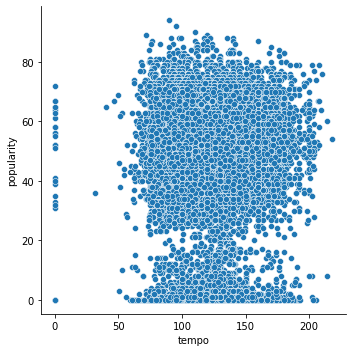

In [15]:
sns.relplot(x="tempo", y="popularity", data=data)

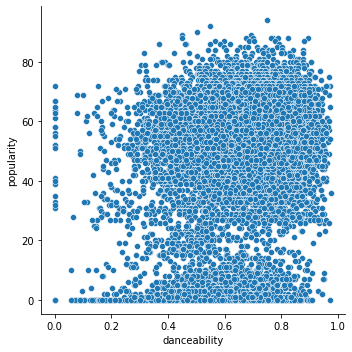

In [16]:
sns.relplot(x="danceability", y="popularity", data=data)

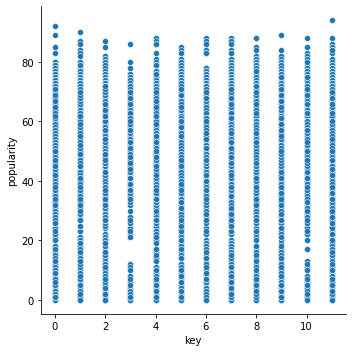

In [17]:
sns.relplot(x="key", y="popularity", data=data)

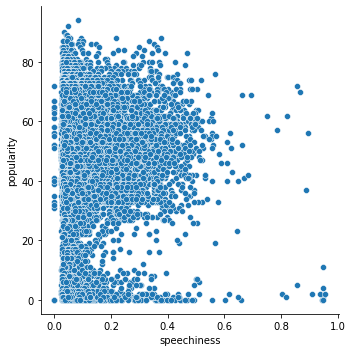

In [18]:
sns.relplot(x="speechiness", y="popularity", data=data)

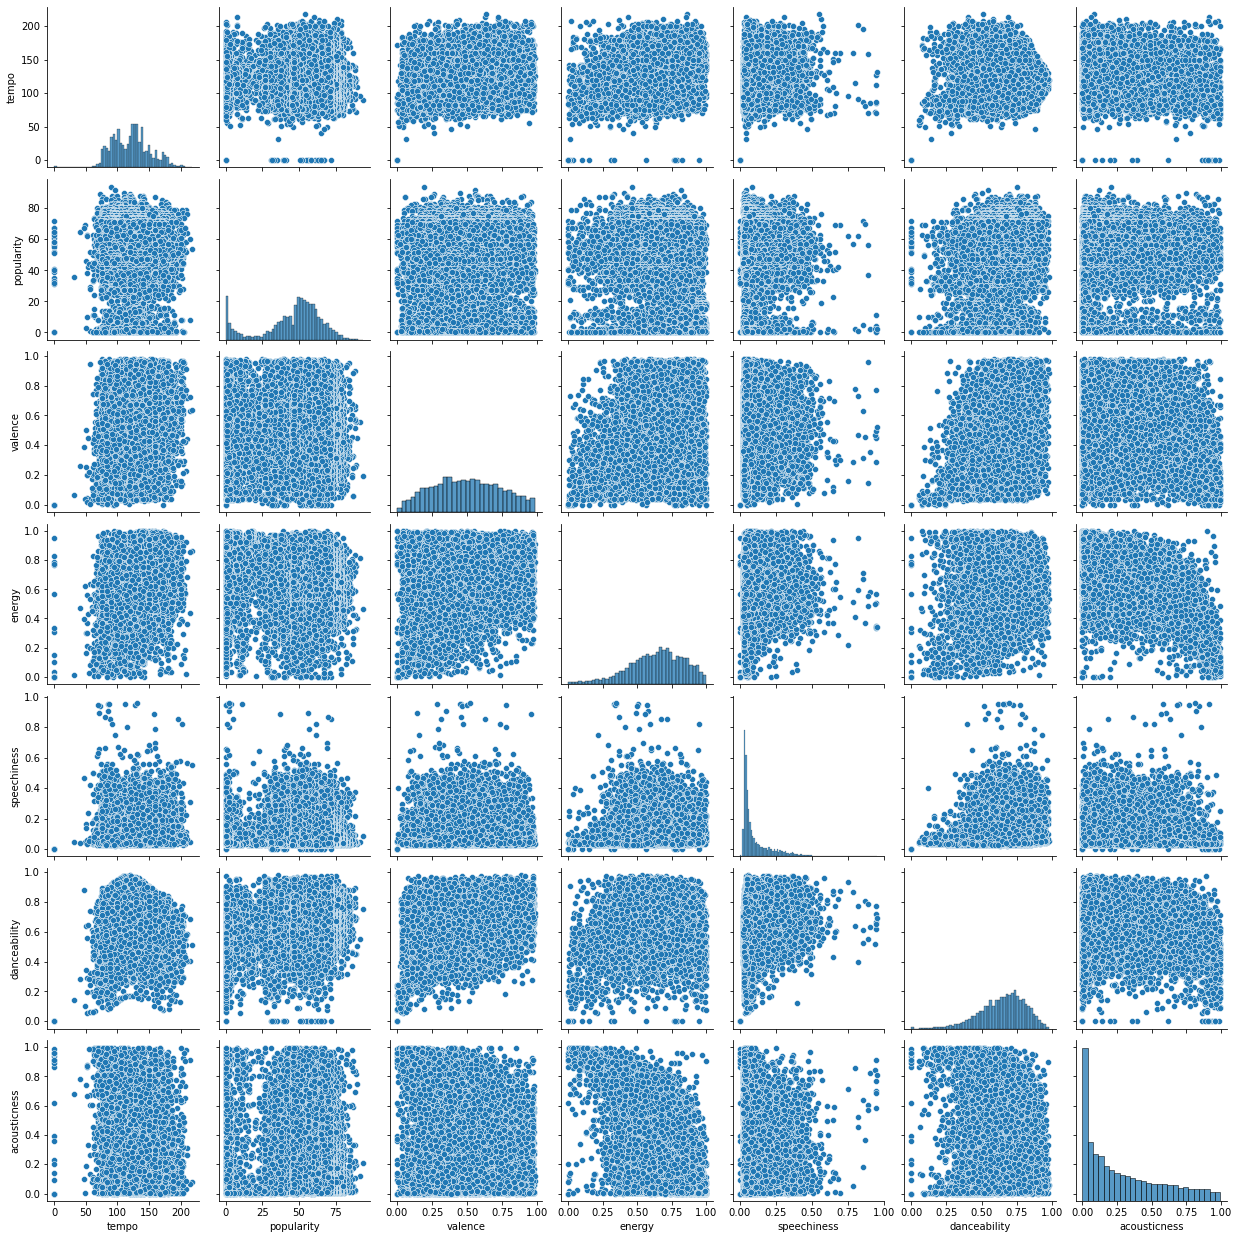

In [19]:
sns.pairplot(data, vars=['tempo', 'popularity', 'valence', 'energy', 'speechiness', 'danceability', 'acousticness'])

<AxesSubplot:>

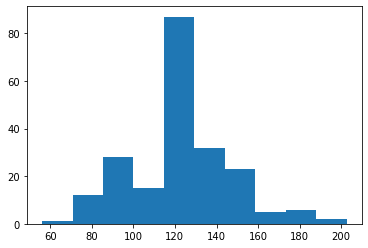

In [20]:
data[data['popularity'] == 1]['tempo'].hist(grid=False, bins=10)


<AxesSubplot:>

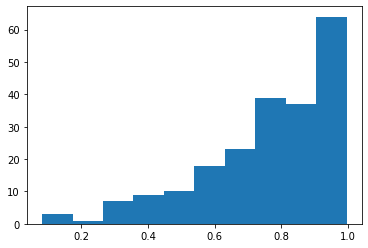

In [21]:
data[data['popularity'] == 1]['energy'].hist(grid=False, bins=10)


<AxesSubplot:>

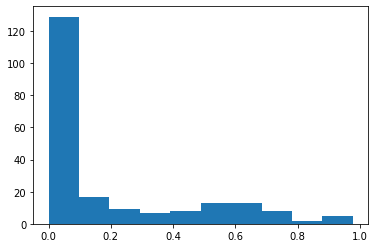

In [22]:
data[data['popularity'] == 1]['acousticness'].hist(grid=False, bins=10)

<AxesSubplot:>

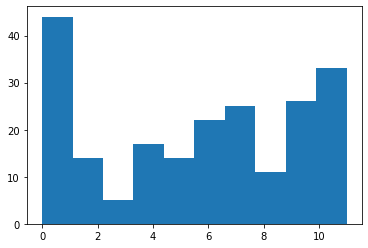

In [23]:
data[data['popularity'] == 1]['key'].hist(grid=False, bins=10)


In [24]:
data.describe()

popularity   duration_ms      explicit  danceability        energy  \
count  10949.000000  1.094900e+04  10949.000000  10949.000000  10949.000000   
mean      45.171249  2.169859e+05      0.219746      0.649780      0.635729   
std       20.720498  1.125070e+05      0.414093      0.160595      0.202034   
min        0.000000  6.360000e+03      0.000000      0.000000      0.000000   
25%       37.000000  1.772330e+05      0.000000      0.551000      0.510000   
50%       50.000000  2.057730e+05      0.000000      0.670000      0.657000   
75%       59.000000  2.403370e+05      0.000000      0.766000      0.787000   
max       94.000000  4.775518e+06      1.000000      0.977000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       5.332907     -7.460552      0.566718      0.112437      0.296103   
std        3.575323      3.694306      0.495551      0.111695      0.279789   
min        0.000000    -42.607000      0.000000      0.000000      0.000000   
25%        2.000000     -8.794000      0.000000      0.039600      0.051300   
50%        6.000000     -6.798000      1.000000      0.061800      0.206000   
75%        8.000000     -5.222000      1.000000      0.145000      0.490000   
max       11.000000      1.221000      1.000000      0.957000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      10949.000000  10949.000000  10949.000000  10949.000000   
mean           0.078117      0.190106      0.495434    122.003987   
std            0.230840      0.163124      0.238454     29.657026   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.096400      0.313000     98.642000   
50%            0.000002      0.123000      0.489000    122.491000   
75%            0.000537      0.228000      0.681000    140.007000   
max            1.000000      0.988000      0.981000    217.832000   

       time_signature  
count    10949.000000  
mean         3.942278  
std          0.375482  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [25]:
print(data.keys())

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [26]:
pd.isnull(data).sum()

id                  462846
name                462846
popularity          462846
duration_ms         462846
explicit            462846
artists             462846
id_artists          462846
release_date        462846
danceability        462846
energy              462846
key                 462846
loudness            462846
mode                462846
speechiness         462846
acousticness        462846
instrumentalness    462846
liveness            462846
valence             462846
tempo               462846
time_signature      462846
dtype: int64

In [27]:
null_data = data[data.isnull().any(axis=1)]
print(null_data)

         id name  popularity  duration_ms  explicit artists id_artists  \
10949   NaN  NaN         NaN          NaN       NaN     NaN        NaN   
10950   NaN  NaN         NaN          NaN       NaN     NaN        NaN   
10951   NaN  NaN         NaN          NaN       NaN     NaN        NaN   
10952   NaN  NaN         NaN          NaN       NaN     NaN        NaN   
10953   NaN  NaN         NaN          NaN       NaN     NaN        NaN   
...     ...  ...         ...          ...       ...     ...        ...   
473790  NaN  NaN         NaN          NaN       NaN     NaN        NaN   
473791  NaN  NaN         NaN          NaN       NaN     NaN        NaN   
473792  NaN  NaN         NaN          NaN       NaN     NaN        NaN   
473793  NaN  NaN         NaN          NaN       NaN     NaN        NaN   
473794  NaN  NaN         NaN          NaN       NaN     NaN        NaN   

       release_date  danceability  energy  key  loudness  mode  speechiness  \
10949           NaN           Na

In [28]:
data.dropna(inplace = True)

In [29]:
pd.isnull(data).sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

C:\Users\Suma Marri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

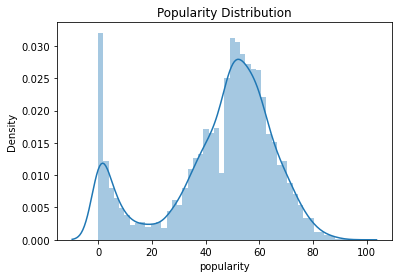

In [30]:
sns.distplot(data['popularity']).set_title('Popularity Distribution')

In [31]:
data.corr()

popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.147147  0.155392      0.193814 -0.102099   
duration_ms        -0.147147     1.000000 -0.082648     -0.121470  0.033802   
explicit            0.155392    -0.082648  1.000000      0.290529 -0.005351   
danceability        0.193814    -0.121470  0.290529      1.000000  0.134523   
energy             -0.102099     0.033802 -0.005351      0.134523  1.000000   
key                 0.003602    -0.002959  0.007775      0.025808  0.041355   
loudness            0.170810     0.013959  0.022977      0.257602  0.688572   
mode               -0.009488     0.040919 -0.083026     -0.092353 -0.088441   
speechiness         0.061784    -0.104894  0.379301      0.244818  0.044134   
acousticness        0.117704    -0.021703 -0.061392     -0.192691 -0.613762   
instrumentalness   -0.417007     0.102895 -0.122278     -0.194143  0.014575   
liveness           -0.107463     0.036597 -0.061529     -0.180732  0.166020   
valence             0.113404    -0.109888  0.005151      0.398079  0.322794   
tempo              -0.023634     0.016473 -0.003159     -0.036500  0.180079   
time_signature      0.004065     0.013150  0.042226      0.217384  0.150020   

                       key  loudness      mode  speechiness  acousticness  \
popularity        0.003602  0.170810 -0.009488     0.061784      0.117704   
duration_ms      -0.002959  0.013959  0.040919    -0.104894     -0.021703   
explicit          0.007775  0.022977 -0.083026     0.379301     -0.061392   
danceability      0.025808  0.257602 -0.092353     0.244818     -0.192691   
energy            0.041355  0.688572 -0.088441     0.044134     -0.613762   
key               1.000000  0.025547 -0.145057     0.029016     -0.011268   
loudness          0.025547  1.000000 -0.041964     0.001977     -0.421470   
mode             -0.145057 -0.041964  1.000000    -0.084880      0.059090   
speechiness       0.029016  0.001977 -0.084880     1.000000     -0.048135   
acousticness     -0.011268 -0.421470  0.059090    -0.048135      1.000000   
instrumentalness -0.000476 -0.330859 -0.020720    -0.134671     -0.050450   
liveness         -0.004617  0.043427  0.010150     0.012082     -0.077666   
valence           0.050398  0.322223 -0.040977     0.076226     -0.134927   
tempo             0.010284  0.160547  0.011049     0.053573     -0.130956   
time_signature    0.030509  0.182331 -0.035263     0.041392     -0.118935   

                  instrumentalness  liveness   valence     tempo  \
popularity               -0.417007 -0.107463  0.113404 -0.023634   
duration_ms               0.102895  0.036597 -0.109888  0.016473   
explicit                 -0.122278 -0.061529  0.005151 -0.003159   
danceability             -0.194143 -0.180732  0.398079 -0.036500   
energy                    0.014575  0.166020  0.322794  0.180079   
key                      -0.000476 -0.004617  0.050398  0.010284   
loudness                 -0.330859  0.043427  0.322223  0.160547   
mode                     -0.020720  0.010150 -0.040977  0.011049   
speechiness              -0.134671  0.012082  0.076226  0.053573   
acousticness             -0.050450 -0.077666 -0.134927 -0.130956   
instrumentalness          1.000000  0.030265 -0.207744 -0.012792   
liveness                  0.030265  1.000000  0.001645  0.011119   
valence                  -0.207744  0.001645  1.000000  0.089893   
tempo                    -0.012792  0.011119  0.089893  1.000000   
time_signature           -0.064647  0.000628  0.107836  0.097738   

                  time_signature  
popularity              0.004065  
duration_ms             0.013150  
explicit                0.042226  
danceability            0.217384  
energy                  0.150020  
key                     0.030509  
loudness                0.182331  
mode                   -0.035263  
speechiness             0.041392  
acousticness           -0.118935  
instrumentalness       -0.064647  
liveness   

<AxesSubplot:xlabel='time_signature', ylabel='popularity'>

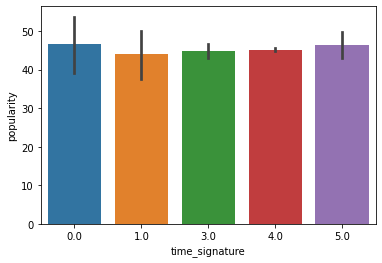

In [32]:
sns.barplot(x = 'time_signature', y = 'popularity', data = data)

<AxesSubplot:xlabel='key', ylabel='popularity'>

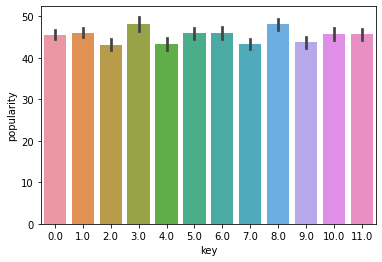

In [33]:
sns.barplot(x = 'key', y = 'popularity', data = data)
#btw, all keys encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…

<AxesSubplot:xlabel='mode', ylabel='popularity'>

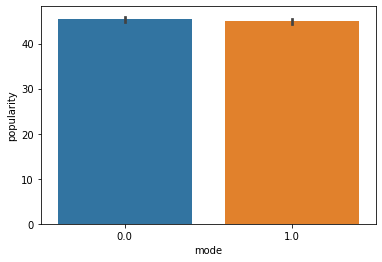

In [34]:
sns.barplot(x = 'mode', y = 'popularity', data = data)
#0 mode = minor, 1 mode = major

<AxesSubplot:xlabel='mode', ylabel='popularity'>

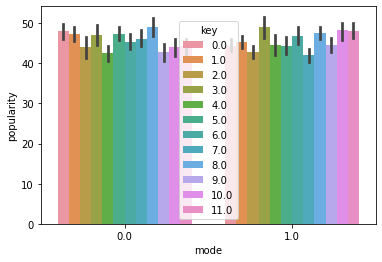

In [35]:
#key and mode are related in music, so let's combine them 
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = data)

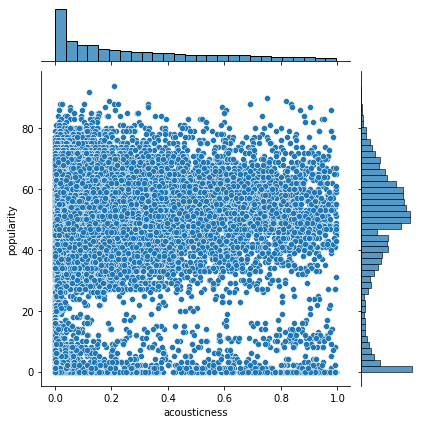

In [36]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = data)

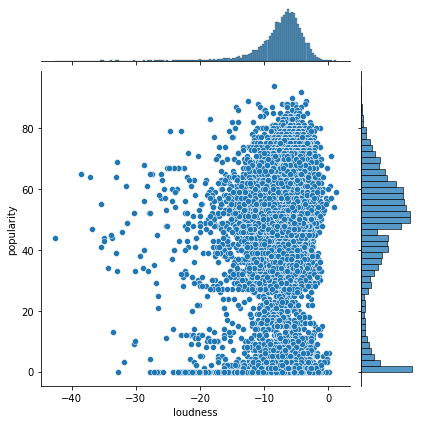

In [37]:
sns.jointplot(x = 'loudness', y = 'popularity', data = data)


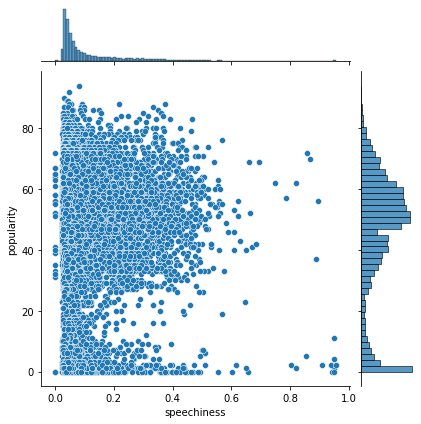

In [38]:
sns.jointplot(x = 'speechiness', y = 'popularity', data = data)


C:\Users\Suma Marri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acousticness', ylabel='Density'>

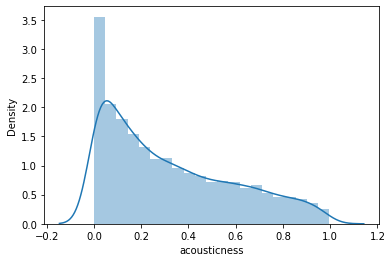

In [39]:
popular_greater_50 = data[data.popularity > 50]
sns.distplot(popular_greater_50['acousticness'])

C:\Users\Suma Marri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acousticness', ylabel='Density'>

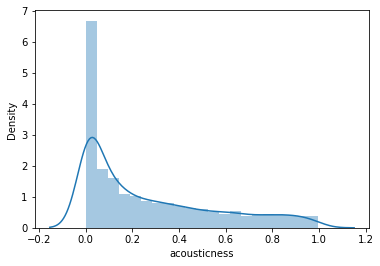

In [40]:
popular_less_50 = data[data.popularity < 50]
sns.distplot(popular_less_50['acousticness'])

C:\Users\Suma Marri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loudness', ylabel='Density'>

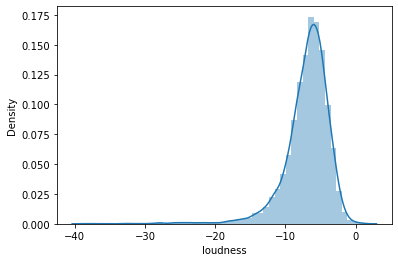

In [41]:
sns.distplot(popular_greater_50['loudness'])

C:\Users\Suma Marri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loudness', ylabel='Density'>

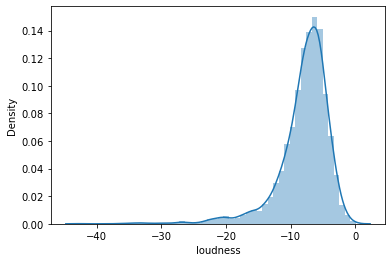

In [42]:
popular_less_50 = data[data.popularity < 50]
sns.distplot(popular_less_50['loudness'])

In [43]:
#one thing i'd like to change moving forward is express duration in minutes and not milliseconds. 
data['duration_m'] = data['duration_ms']/60000
data = data.reindex(sorted(data.columns), axis=1)
data.head()


acousticness             artists  danceability  duration_m  duration_ms  \
0      0.004500  ['Jonas Brothers']         0.659    3.366000     201960.0   
1      0.083200    ['Electro Mann']         0.745    3.611750     216705.0   
2      0.000623             ['UVB']         0.699    5.147067     308824.0   
3      0.706000      ['The Friars']         0.621    3.135750     188145.0   
4      0.009030     ['Reza Golroo']         0.797    6.561267     393676.0   

   energy  explicit                      id                  id_artists  \
0   0.857       0.0  4zP7ADsgJgHGY6VzxbNp1z  ['7gOdHgIoIKoe4i9Tta6qdD']   
1   0.732       0.0  5Q8lhXskGhfVIMbRMGi9nk  ['715ETHjAlf1sXM4vFEmxjT']   
2   0.994       0.0  6GEOjP12NG6wnuQIg6NC5A  ['1LiE3TKOyCds5GgIaBRRRs']   
3   0.678       0.0  0soQcQgZGxvHa3MyQMVfes  ['6Fb8ldZIVQEaszpTmZh0Du']   
4   0.715       0.0  5g5fyKQcR8H5U5c7znvrgs  ['5PgfADiJty3IuidZvOoFYM']   

   instrumentalness  ...  liveness  loudness  mode  \
0          0.000002  ...    0.3350    -5.850   1.0   
1          0.929000  ...    0.0691   -11.286   1.0   
2          0.703000  ...    0.1590    -5.869   1.0   
3          0.000000  ...    0.8260    -6.274   1.0   
4          0.818000  ...    0.0624    -7.496   1.0   

                                    name popularity  release_date speechiness  \
0                              Year 3000       67.0      5/9/2019      0.0437   
1          Logical Brain - Year 3000 Mix        8.0    10/24/2019      0.0759   
2  3000 Years of Lies - Original Version        9.0      2/8/2019      0.0442   
3                       Year 3000 (Live)        0.0     4/11/2019      0.0665   
4                          The Year 3000        0.0      3/1/2019      0.0509   

     tempo  time_signature  valence  
0  106.965             4.0    0.798  
1  125.000             4.0    0.954  
2  135.998             4.0    0.131  
3  102.392             4.0    0.586  
4  127.992             4.0    0.290  

[5 rows x 21 columns]

In [44]:
data.drop('duration_ms', axis = 1, inplace = True)

In [45]:
data.describe()

acousticness  danceability    duration_m        energy      explicit  \
count  10949.000000  10949.000000  10949.000000  10949.000000  10949.000000   
mean       0.296103      0.649780      3.616432      0.635729      0.219746   
std        0.279789      0.160595      1.875117      0.202034      0.414093   
min        0.000000      0.000000      0.106000      0.000000      0.000000   
25%        0.051300      0.551000      2.953883      0.510000      0.000000   
50%        0.206000      0.670000      3.429550      0.657000      0.000000   
75%        0.490000      0.766000      4.005617      0.787000      0.000000   
max        0.996000      0.977000     79.591967      1.000000      1.000000   

       instrumentalness           key      liveness      loudness  \
count      10949.000000  10949.000000  10949.000000  10949.000000   
mean           0.078117      5.332907      0.190106     -7.460552   
std            0.230840      3.575323      0.163124      3.694306   
min            0.000000      0.000000      0.000000    -42.607000   
25%            0.000000      2.000000      0.096400     -8.794000   
50%            0.000002      6.000000      0.123000     -6.798000   
75%            0.000537      8.000000      0.228000     -5.222000   
max            1.000000     11.000000      0.988000      1.221000   

               mode    popularity   speechiness         tempo  time_signature  \
count  10949.000000  10949.000000  10949.000000  10949.000000    10949.000000   
mean       0.566718     45.171249      0.112437    122.003987        3.942278   
std        0.495551     20.720498      0.111695     29.657026        0.375482   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000     37.000000      0.039600     98.642000        4.000000   
50%        1.000000     50.000000      0.061800    122.491000        4.000000   
75%        1.000000     59.000000      0.145000    140.007000        4.000000   
max        1.000000     94.000000      0.957000    217.832000        5.000000   

            valence  
count  10949.000000  
mean       0.495434  
std        0.238454  
min        0.000000  
25%        0.313000  
50%        0.489000  
75%        0.681000  
max        0.981000

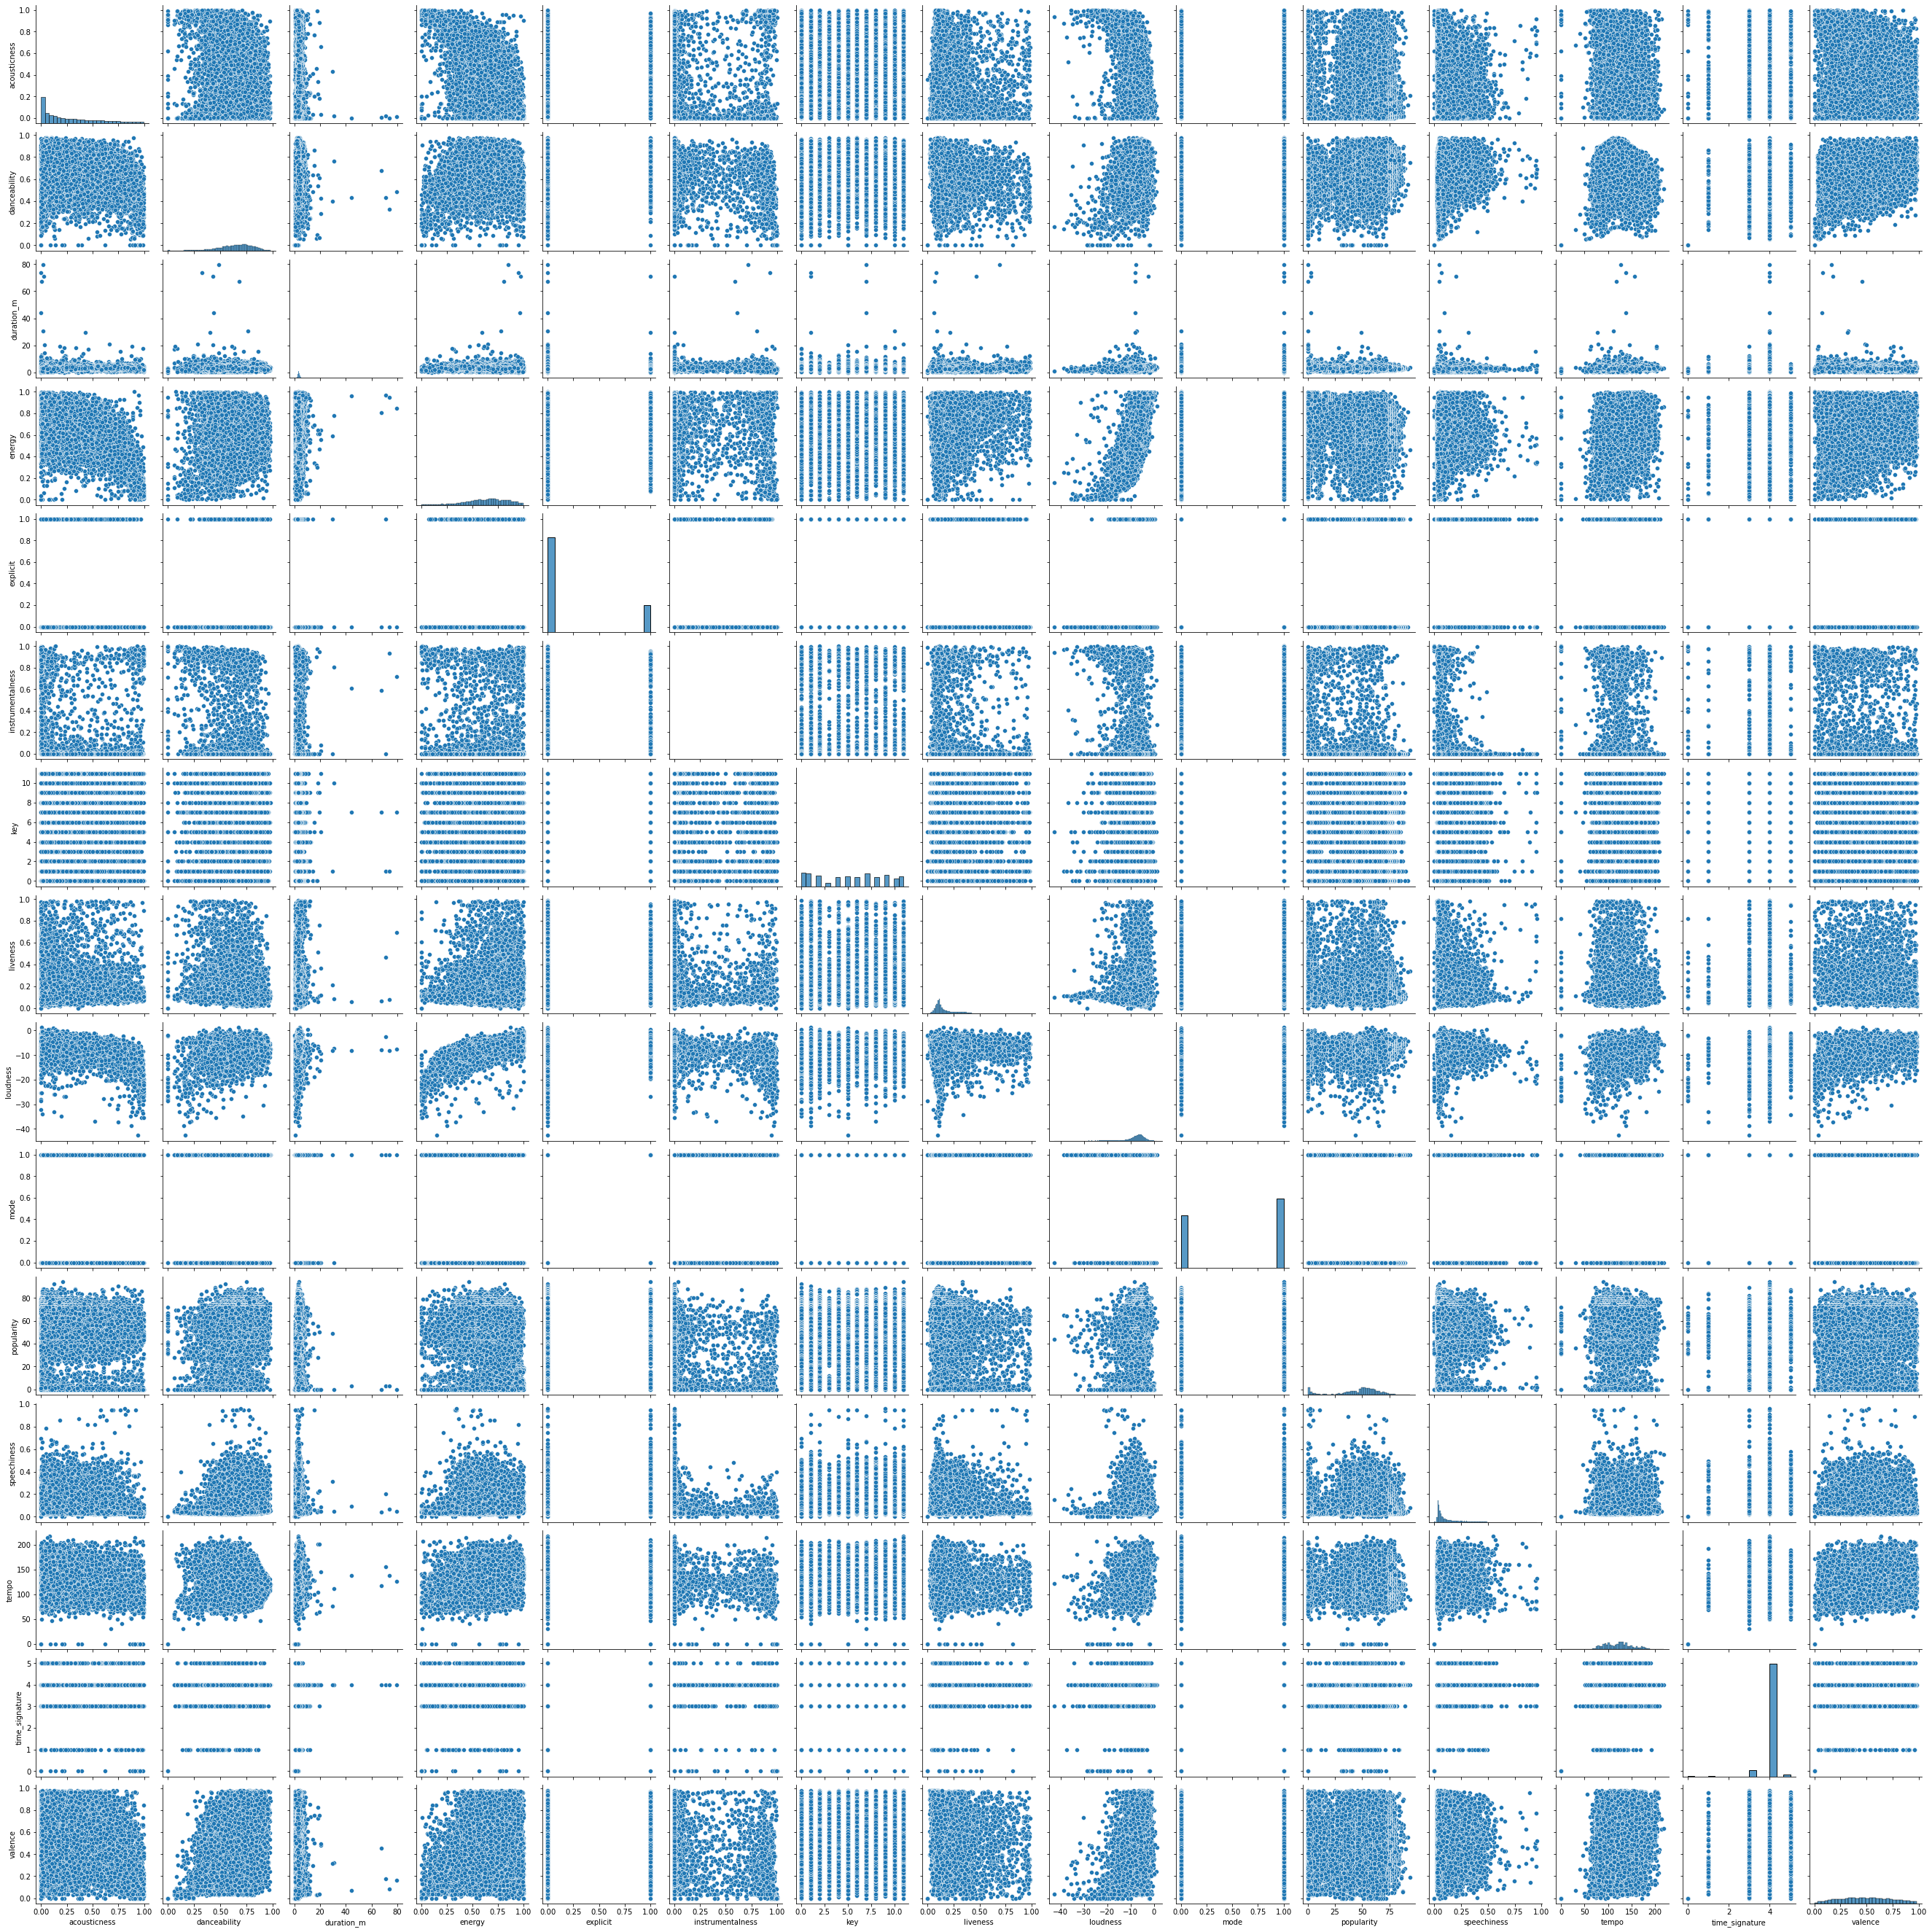

In [46]:
sns.pairplot(data)

In [47]:
#spotting outliers. Let's look at songs that are over 60 minutes long 
data[data['duration_m']>60]

acousticness                    artists  danceability  duration_m  \
2000      0.022900           ['Bass Chaserz']         0.433   70.973433   
2005      0.016600            ['John Clarcq']         0.488   79.591967   
2033      0.000385             ['Ori Uplift']         0.326   73.732533   
2858      0.004990  ['Ivan Starzev', 'KeySi']         0.678   67.440283   

      energy  explicit                      id  \
2000   0.969       1.0  4tJGs332AeFweYxnb3zdsO   
2005   0.847       0.0  6ZryuGcNCvBNTVt3cL76VN   
2033   0.947       0.0  7A2pi6rsq0r4I9TXizSCqG   
2858   0.806       0.0  3Spac8g9cWtNvW5UYqeRAg   

                                             id_artists  instrumentalness  \
2000                         ['5SxjKJ2HIg3dVQ427HYVHS']             0.000   
2005                         ['2BqsWXdFTpzzm1soINL0bC']             0.717   
2033                         ['2fg0rbTcqysRCU6yvu27Xb']             0.932   
2858  ['6fGFhSCmG6B0dyRT0cVw5a', '3pemop3JUAT1yLimAb...             0.591   

      key  liveness  loudness  mode  \
2000  1.0    0.4670    -2.428   1.0   
2005  7.0    0.6940    -7.627   1.0   
2033  1.0    0.0814    -8.202   1.0   
2858  7.0    0.0636    -7.945   1.0   

                                                   name  popularity  \
2000      Nightbreed 2019 Yearmix - Full Continuous Mix         3.0   
2005         Alltum Yearmix 2019 - mixed by John Clarcq         0.0   
2033  Uplifting Only: Orchestral Trance Year Mix 201...         3.0   
2858  Soviett New Year 2019 (Compiled & Mixed by Iva...         0.0   

     release_date  speechiness    tempo  time_signature  valence  
2000   12/23/2019       0.2020  156.025             4.0   0.1770  
2005   12/20/2019       0.0459  126.819             4.0   0.1650  
2033    2/21/2019       0.0682  138.009             4.0   0.0817  
2858     1/7/2019       0.0442  117.997             4.0   0.4570

In [48]:
#Yep, lots of ambient tracks, lots of mixes and of course, a Brian Eno song. 

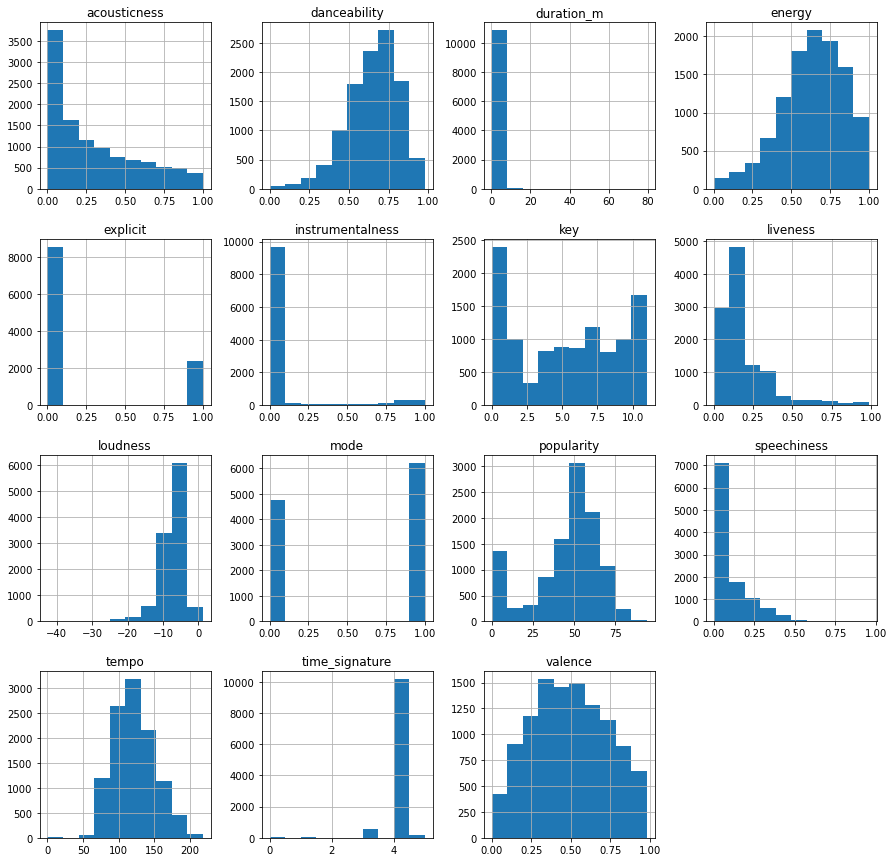

In [49]:
data.hist(figsize=(15, 15))
plt.show()

<AxesSubplot:>

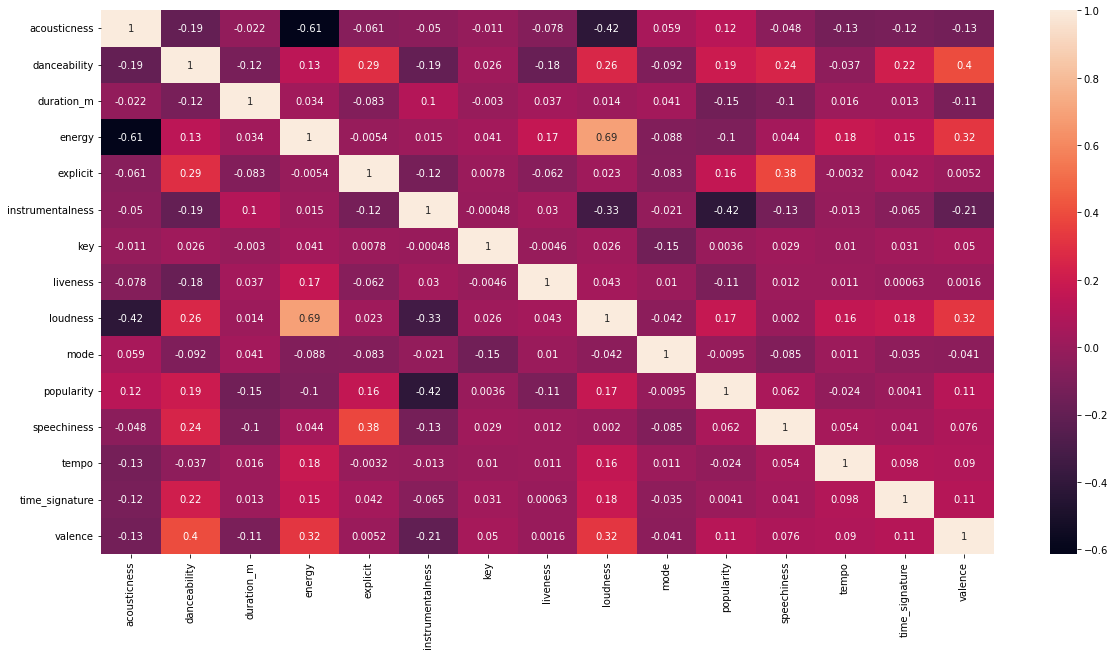

In [50]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),annot = True)

## Reminder: my hypothesis: can we predict a song's popularity based on certain features of the song? 
### a few things stand out:
#### - acousticness
#### - instrumentalness
#### - loudness
#### - energy

<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

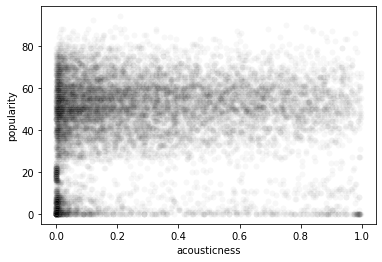

In [51]:
sns.scatterplot(x = 'acousticness', y = 'popularity', data = data, alpha = 0.03, color = 'black')

<AxesSubplot:xlabel='instrumentalness', ylabel='popularity'>

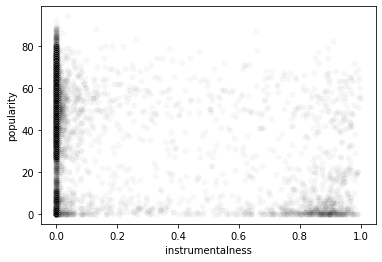

In [52]:
sns.scatterplot(x = 'instrumentalness', y = 'popularity', data = data, alpha = 0.03, color = 'black')

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

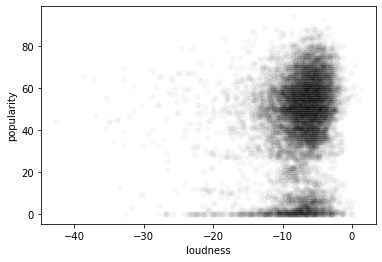

In [53]:
sns.scatterplot(x = 'loudness', y = 'popularity', data = data, alpha = 0.03, color = 'black')

<AxesSubplot:xlabel='energy', ylabel='popularity'>

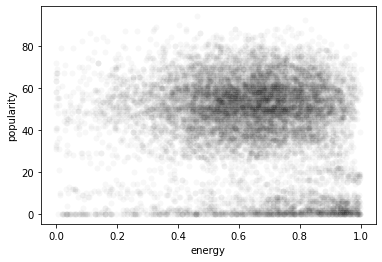

In [54]:
sns.scatterplot(x = 'energy', y = 'popularity', data = data, alpha = 0.03, color = 'black')

## Modeling and Predicting 

### 1. Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [56]:
data.head(20)

acousticness                                            artists  \
0       0.004500                                 ['Jonas Brothers']   
1       0.083200                                   ['Electro Mann']   
2       0.000623                                            ['UVB']   
3       0.706000                                     ['The Friars']   
4       0.009030                                    ['Reza Golroo']   
5       0.313000                                      ['Zeliwipin']   
6       0.500000                               ['Craic Boi Mental']   
7       0.983000                                  ['Paul Kienbeck']   
8       0.006000                                        ['The KBK']   
9       0.000244  ['Blaze', 'UDAUFL', 'Barbara Tucker', 'Dennis ...   
10      0.003010                                    ['Reza Golroo']   
11      0.050100                                     ['BuckHolmes']   
12      0.018200                                    ['Reza Golroo']   
13      0.016200                                     ['BuckHolmes']   
14      0.000061                                    ['Reza Golroo']   
15      0.028800                                     ['BuckHolmes']   
16      0.173000                              ['Bandit 3000 Alpha']   
17      0.008600                              ['Bandit 3000 Alpha']   
18      0.087400                              ['Bandit 3000 Alpha']   
19      0.193000                              ['Bandit 3000 Alpha']   

    danceability  duration_m   energy  explicit                      id  \
0          0.659    3.366000  0.85700       0.0  4zP7ADsgJgHGY6VzxbNp1z   
1          0.745    3.611750  0.73200       0.0  5Q8lhXskGhfVIMbRMGi9nk   
2          0.699    5.147067  0.99400       0.0  6GEOjP12NG6wnuQIg6NC5A   
3          0.621    3.135750  0.67800       0.0  0soQcQgZGxvHa3MyQMVfes   
4          0.797    6.561267  0.71500       0.0  5g5fyKQcR8H5U5c7znvrgs   
5          0.772    2.297033  0.48300       0.0  1FRqXqDtqxy0K99sQTWBWR   
6          0.529    2.422233  0.54100       0.0  1LG4omqDIUFAsAIX768f9g   
7          0.238    3.033333  0.00578       0.0  1m4z23HIiOPNZsz6U81Psc   
8          0.137    2.498217  0.91700       0.0  3Erk7PtpFjsUY4T9P8xyGO   
9          0.807    7.222000  0.85100       0.0  0Ke4BNjApUhk9bgvRDNSUe   
10         0.766    6.059250  0.87100       0.0  35dUmoQxLByO0rH1JT4ZeS   
11         0.715    2.941383  0.51300       1.0  0cz5MTRb9GkseDcgZ4JI9N   
12         0.836    6.155667  0.77900       0.0  3pHV4k0xnD07vqFYRGpFhe   
13         0.877    2.849083  0.52300       1.0  2DpkEE6E7awYDlf2aVUj50   
14         0.805    6.218983  0.88000       0.0  0ALmdYounN3NB0i4Kzpmv0   
15         0.944    2.691483  0.47400       1.0  6LlW7yN8IgNuf2Q5U13z4J   
16         0.719    3.700000  0.63500       0.0  78G89jzD2NQLq2acKmwyCF   
17         0.452    4.066667  0.87500       0.0  23PYQiCrGOAsaq5XDYqNyA   
18         0.720    3.216667  0.37700       0.0  3LZIqWXMHpDSMRTPrAdpVc   
19         0.676    3.083333  0.78000       0.0  7AiFVKRRLJOnIVX0mNymcS   

                                           id_artists  instrumentalness   key  \
0                          ['7gOdHgIoIKoe4i9Tta6qdD']          0.000002  11.0   
1                          ['715ETHjAlf1sXM4vFEmxjT']          0.929000   9.0   
2                          ['1LiE3TKOyCds5GgIaBRRRs']          0.703000   7.0   
3                          ['6Fb8ldZIVQEaszpTmZh0Du']          0.000000   6.0   
4                          ['5PgfADiJty3IuidZvOoFYM']          0.818000   0.0   
5                          ['037nAqPqJicOFdwscFyJAM']          0.638000   4.0   
6                          ['5KsCWlnWbfDVN7hAwm1C8Q']          0.000047   0.0   
7                          ['5h0OQm3X8UgJToDXrRL5kH']          0.000774   0.0   
8                          ['4u0kqsugXZAXjykqArePJe']          0.774000   4.0   
9   ['5yK5YSsWKH35QRTsHQHxEN', '2GTRVovNrpq94MSO7m...          0.008120   5.0   
10                         ['5PgfADiJty3IuidZ

In [57]:
data = pd.get_dummies(data, columns=['time_signature', 'key', 'mode'], drop_first=True)


In [58]:
pd.options.display.max_columns = None


In [59]:
data.head()

acousticness             artists  danceability  duration_m  energy  \
0      0.004500  ['Jonas Brothers']         0.659    3.366000   0.857   
1      0.083200    ['Electro Mann']         0.745    3.611750   0.732   
2      0.000623             ['UVB']         0.699    5.147067   0.994   
3      0.706000      ['The Friars']         0.621    3.135750   0.678   
4      0.009030     ['Reza Golroo']         0.797    6.561267   0.715   

   explicit                      id                  id_artists  \
0       0.0  4zP7ADsgJgHGY6VzxbNp1z  ['7gOdHgIoIKoe4i9Tta6qdD']   
1       0.0  5Q8lhXskGhfVIMbRMGi9nk  ['715ETHjAlf1sXM4vFEmxjT']   
2       0.0  6GEOjP12NG6wnuQIg6NC5A  ['1LiE3TKOyCds5GgIaBRRRs']   
3       0.0  0soQcQgZGxvHa3MyQMVfes  ['6Fb8ldZIVQEaszpTmZh0Du']   
4       0.0  5g5fyKQcR8H5U5c7znvrgs  ['5PgfADiJty3IuidZvOoFYM']   

   instrumentalness  liveness  loudness  \
0          0.000002    0.3350    -5.850   
1          0.929000    0.0691   -11.286   
2          0.703000    0.1590    -5.869   
3          0.000000    0.8260    -6.274   
4          0.818000    0.0624    -7.496   

                                    name  popularity release_date  \
0                              Year 3000        67.0     5/9/2019   
1          Logical Brain - Year 3000 Mix         8.0   10/24/2019   
2  3000 Years of Lies - Original Version         9.0     2/8/2019   
3                       Year 3000 (Live)         0.0    4/11/2019   
4                          The Year 3000         0.0     3/1/2019   

   speechiness    tempo  valence  time_signature_1.0  time_signature_3.0  \
0       0.0437  106.965    0.798                   0                   0   
1       0.0759  125.000    0.954                   0                   0   
2       0.0442  135.998    0.131                   0                   0   
3       0.0665  102.392    0.586                   0                   0   
4       0.0509  127.992    0.290                   0                   0   

   time_signature_4.0  time_signature_5.0  key_1.0  key_2.0  key_3.0  key_4.0  \
0                   1                   0        0        0        0        0   
1                   1                   0        0        0        0        0   
2                   1                   0        0        0        0        0   
3                   1                   0        0        0        0        0   
4                   1                   0        0        0        0        0   

   key_5.0  key_6.0  key_7.0  key_8.0  key_9.0  key_10.0  key_11.0  mode_1.0  
0        0        0        0        0        0         0         1         1  
1        0        0        0        0        1         0         0         1  
2        0        0        1        0        0         0         0         1  
3        0        1        0        0        0         0         0         1  
4        0        0        0        0        0         0         0         1

In [60]:
features = ["acousticness", "danceability", "duration_m", "energy", "instrumentalness", "liveness", 
             "speechiness", "loudness", "tempo", "valence"]

In [61]:
X = data[features]
y = data['popularity']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features2 = ['acousticness', 'instrumentalness', 'loudness', 'energy']

X_train, X_test, y_train, y_test = train_test_split(X[features2], y, train_size=0.5, random_state=8)


In [63]:

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.21152228570143972

In [64]:
print(lr.intercept_)
print(lr.coef_)
zip(features, lr.coef_)

72.24773717120163
[  3.93990324 -29.6722309    1.43587682 -23.90271754]


In [65]:
y_pred = lr.predict(X_test)

In [66]:
from sklearn import metrics
from sklearn.metrics import r2_score


In [67]:
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.21152228570143972
13.876763805529231
337.71458395079765
18.37701237826208


In [68]:
X.columns

Index(['acousticness', 'danceability', 'duration_m', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'loudness', 'tempo',
       'valence'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

predictors = ['acousticness', 'instrumentalness', 'loudness', 'energy']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.5, random_state=8)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.21152228570143972

features = ["acousticness", "danceability", "duration_m", "energy", "instrumentalness", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11", "liveness", 
            "mode_1", "speechiness", "loudness", "tempo", "time_signature_1", "time_signature_3", "time_signature_4", "time_signature_5", "valence"]

X = data[features]
y = data['popularity']

linreg = LinearRegression()
linreg.fit(X, y)

from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

scores = cross_val_score(linreg, X, y, cv=5)
print(scores)

C:\Users\Suma Marri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


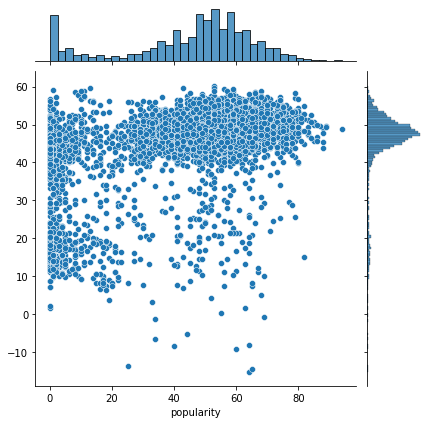

In [70]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat);

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.7, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)
lr2.score(X_test, y_test)

0.2078281455844434

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.9, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)
lr2.score(X_test, y_test)

0.21877318596968132

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model

scores = cross_val_score(linreg, X, y, cv=5)
print(scores)

NameError: name 'linreg' is not defined

## Decision tree:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth_range = range(1, 15)

RMSE_scores = []

from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [ ]:
sorted(zip(RMSE_scores, max_depth_range))[0]

In [ ]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
treereg.fit(X, y)

In [ ]:
# Computing feature importances.
pd.DataFrame({'feature':features, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

## 2. random forest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfreg = RandomForestRegressor(n_estimators=150,
                              max_features=5,
                              oob_score=True,
                              random_state=1)
rfreg.fit(X, y)

In [ ]:
pd.DataFrame({'feature':features,
              'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)

In [ ]:
print((rfreg.oob_score_))

In [ ]:
scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

### Regression analysis is not getting us too far. Time to try a classification approach:

In [ ]:
data.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
pd.cut(data['popularity'], bins=3)

In [ ]:
pd.cut(data['popularity'], bins=3, labels = ["low", "medium", "high"]).value_counts()


In [ ]:
data['popularity'] = pd.cut(data.popularity, bins=3, labels = ["low", "medium", "high"], right = True)

In [ ]:
data.head(100)

In [ ]:
data.loc[data['popularity']== 'high']

In [ ]:
y = data.popularity
y.value_counts()/y.count()

In [ ]:
import numpy as np
import pandas as pd
pop_count = data.popularity.value_counts()

!pip install imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Removed indexes:')

print(X_ros.shape, y_ros.shape)

In [ ]:
y_ros.value_counts()

In [ ]:
X_ros.value_counts()

#### reinputting 4 features to set up design matrix 


In [ ]:
feature_cols = ['acousticness', 'instrumentalness', 'loudness', 'energy']
X = data[feature_cols]


In [ ]:
X_ros.head()

In [ ]:
X.head()

In [ ]:
print(X_ros.shape)
print(y_ros.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_ros, y_ros)

### evaluating model 

In [ ]:
y_pred_class = knn.predict(X_ros)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y_ros, y_pred_class))

In [ ]:
#this is a paradigm shift in terms of accuracy from our regression analysis. 
#A ~99% accuracy as compared to >19% during our regression analysis. 
#Perhaps we are overfitting here, as this smells suspicious...

In [ ]:
#Let's creat a 50/50 train-test-split of our target/predictors. We'll refit KNN and check out the accuracy 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
#Looks a bit more adjusted, but still significantly better than during regression analysis. 
#But let's dig further into assessing accuracy.
#We'll search for the best value for K below...

In [ ]:

k_range = range(1, 21)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
k_range = range(20, 27)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
k_range = range(30, 37)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
k_range = range(40, 49)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
k_range = range(82, 89)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
k_range = range(97, 106)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
k_dict=dict(zip(k_range,k_scores))
k_dict

In [ ]:
max(k_dict, key= k_dict.get)

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
k_range2 = range(1, 22)
param_dist = dict(n_neighbors=k_range2)


In [ ]:
rand = RandomizedSearchCV(knn, param_dist, cv=5, scoring='accuracy', n_iter=5, random_state=5)

In [ ]:
rand.fit(X_train, y_train)


In [ ]:
rand.cv_results_

In [ ]:
# examining the best model
print(rand.best_score_) #single best score achieved across all params 
print(rand.best_params_) #Dictionary containing the parameters (k) used to generate that score
print(rand.best_estimator_) #estimator which gave the highest score 

In [ ]:
#Our best KNN model can accurately predict labels for 74.71% of the data points, using optimal value for K (3). 


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report


### Classification Report

In [ ]:
print(classification_report(y_test,y_pred_class))


In [ ]:
#lets test it! 

In [ ]:
#create a fake row
new_track = pd.DataFrame({
    'acousticness': 0.666,
    'instrumentalness': .003 ,
    'loudness': 3.4,
    'energy': .2,
}, index=[0])

In [ ]:
import numpy as np
rand = KNeighborsClassifier(n_neighbors=3)
rand.fit(X_train, y_train)
rand.predict(new_track)

In [ ]:
np.unique(y_pred_class, return_counts = True)

### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cmat = confusion_matrix(y_test, y_pred_class)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat)))) 
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_class)